In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [34]:
def accuracy_score(matrix):
    tp_sum = 0
    score = 0
    np.array(matrix)
    for i in range(len(matrix)):
        tp_sum += matrix[i][i]
        
    score = tp_sum / np.sum(matrix)
    return score

def plot_scores(accuracy_scores):
    k_base = [(min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1), 
              (min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1), (min(accuracy_scores)-1)]
    plt.plot(range(5,51,5), accuracy_scores, color='green', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10, label="Accuracy scores")
    plt.plot(range(5,51,5), k_base, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10, label="k value")
    plt.xlabel("value of k")
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

def knn(train_data, test_data, train_label, test_label):
    errors = []
    scores = []
    for i in range(5,51,5):
        start_time = time.time()
        knn_e = KNeighborsClassifier(n_neighbors=i)
        knn_e.fit(train_data, train_label)
        pred_label = knn_e.predict(test_data)
        end_time = time.time()
        errors.append(np.mean(pred_label != test_label)) # storing mean-error values

        print("======================================================")
        print("\nReport using k=", i, ":\n")
        print(classification_report(test_label, pred_label)) 
        matrix = confusion_matrix(test_label, pred_label)
        accuracy = accuracy_score(matrix)*100
        print("\nAccuracy score: ", "%.2f" % accuracy, "%","    Execution time: ", "%.3f" % (end_time-start_time), "s")
        print("======================================================")
        scores.append(float("%.2f" % accuracy))
    plot_scores(scores)

In [35]:
data = pd.read_csv("mnist_test.csv")

In [36]:
data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
features = data.drop("label", axis=1)
labels = data.iloc[:,0]

In [38]:
# Converting data into int64 to float64
features = features.astype('float64') # 

In [39]:
# Objects for data optimization
m_scale = MinMaxScaler()
s_scale = StandardScaler()
e_data = TSNE(n_components=2, perplexity=30, random_state=100)

In [40]:
# Optimizing data
m_scale_optimized_data = m_scale.fit_transform(features)
s_scale_optimized_data = s_scale.fit_transform(features)
embeded_data = e_data.fit_transform(features)

In [41]:
# Optimizing embeded data
m_scale_embeded_data = m_scale.fit_transform(embeded_data)
s_scale_embeded_data = s_scale.fit_transform(embeded_data)

In [42]:
# Spliting data into training and test data
r_train_data, r_test_data, r_train_label, r_test_label = train_test_split(features, labels, test_size = 0.3, random_state = 200)
m_train_data, m_test_data, m_train_label, m_test_label = train_test_split(m_scale_optimized_data, labels, test_size = 0.3, random_state = 300)
s_train_data, s_test_data, s_train_label, s_test_label = train_test_split(s_scale_optimized_data, labels, test_size = 0.3, random_state = 400)
e_train_data, e_test_data, e_train_label, e_test_label = train_test_split(embeded_data, labels, test_size = 0.3, random_state = 500)

In [43]:
# Spliting optimized embeded data into training and test data
me_train_data, me_test_data, me_train_label, me_test_label = train_test_split(m_scale_embeded_data, labels, test_size = 0.3, random_state = 600)
se_train_data, se_test_data, se_train_label, se_test_label = train_test_split(s_scale_embeded_data, labels, test_size = 0.3, random_state = 700)

# kNN with raw data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       302
           1       0.90      1.00      0.94       355
           2       0.98      0.93      0.95       284
           3       0.95      0.96      0.96       297
           4       0.97      0.90      0.93       302
           5       0.95      0.92      0.93       262
           6       0.98      0.97      0.98       302
           7       0.95      0.94      0.95       323
           8       0.98      0.91      0.94       278
           9       0.90      0.93      0.91       295

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


Accuracy score:  94.77 %     Execution time:  62.417 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       302
           1       0.87      1.

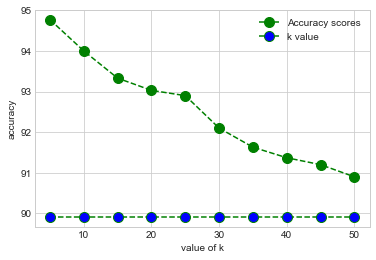

In [44]:
knn(r_train_data, r_test_data, r_train_label, r_test_label)

# kNN with min-max optimized raw data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       273
           1       0.89      0.99      0.94       344
           2       0.98      0.89      0.93       307
           3       0.94      0.95      0.95       310
           4       0.94      0.92      0.93       297
           5       0.95      0.92      0.94       262
           6       0.95      0.97      0.96       269
           7       0.93      0.94      0.94       308
           8       0.97      0.92      0.95       302
           9       0.94      0.93      0.93       328

   micro avg       0.94      0.94      0.94      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000


Accuracy score:  94.30 %     Execution time:  52.343 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       273
           1       0.87      0.

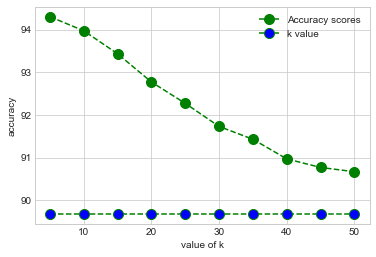

In [45]:
knn(m_train_data, m_test_data, m_train_label, m_test_label)

# kNN with standard scaler optimized raw data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       316
           1       0.90      0.99      0.94       339
           2       0.93      0.88      0.91       304
           3       0.88      0.96      0.91       294
           4       0.89      0.91      0.90       294
           5       0.92      0.88      0.90       284
           6       0.95      0.94      0.94       279
           7       0.90      0.92      0.91       277
           8       0.96      0.81      0.88       297
           9       0.90      0.86      0.88       316

   micro avg       0.91      0.91      0.91      3000
   macro avg       0.92      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000


Accuracy score:  91.37 %     Execution time:  44.708 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       316
           1       0.86      0.

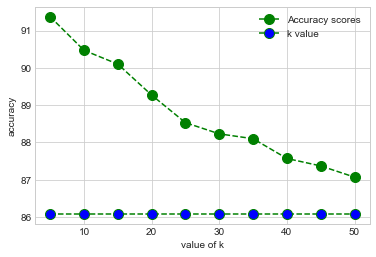

In [46]:
knn(s_train_data, s_test_data, s_train_label, s_test_label)

# kNN with embeded data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       293
           1       0.96      0.99      0.98       339
           2       0.96      0.95      0.96       296
           3       0.92      0.96      0.94       317
           4       0.95      0.96      0.95       301
           5       0.93      0.93      0.93       265
           6       0.96      0.98      0.97       289
           7       0.94      0.95      0.94       298
           8       0.98      0.91      0.94       295
           9       0.96      0.92      0.94       307

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


Accuracy score:  95.30 %     Execution time:  0.032 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       293
           1       0.95      1.0

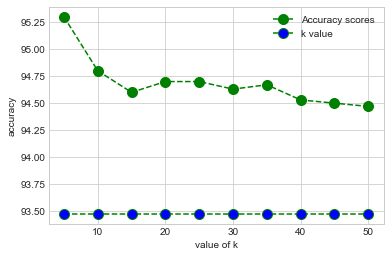

In [47]:
knn(e_train_data, e_test_data, e_train_label, e_test_label)

# kNN with min-max optimized embeded data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       312
           1       0.95      0.99      0.97       346
           2       0.97      0.90      0.93       294
           3       0.94      0.93      0.94       329
           4       0.95      0.94      0.94       295
           5       0.93      0.93      0.93       274
           6       0.97      0.97      0.97       274
           7       0.93      0.95      0.94       300
           8       0.96      0.93      0.95       296
           9       0.93      0.93      0.93       280

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


Accuracy score:  94.77 %     Execution time:  0.028 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       312
           1       0.93      1.0

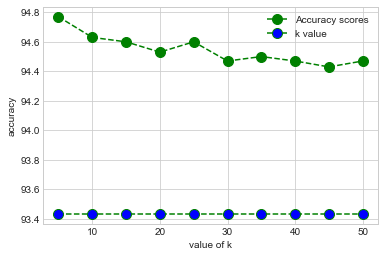

In [48]:
knn(me_train_data, me_test_data, me_train_label, me_test_label)

# kNN with standard scaler optimized embeded data


Report using k= 5 :

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       288
           1       0.94      0.99      0.97       362
           2       0.98      0.93      0.95       297
           3       0.93      0.94      0.93       305
           4       0.96      0.95      0.95       314
           5       0.93      0.90      0.91       263
           6       0.95      0.99      0.97       275
           7       0.92      0.94      0.93       311
           8       0.96      0.92      0.94       301
           9       0.94      0.93      0.93       284

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000


Accuracy score:  94.83 %     Execution time:  0.034 s

Report using k= 10 :

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       288
           1       0.93      1.0

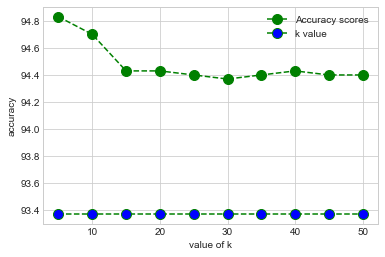

In [49]:
knn(se_train_data, se_test_data, se_train_label, se_test_label)